In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

orig_img = imread('resources/o1.png')
gray_img = rgb2gray(orig_img)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [2]:
import numpy as np

r,c = gray_img.shape
vertical_projection = []

#vertical projection
for index in range(c):
    vertical_projection.append(np.sum(gray_img[:,index]))

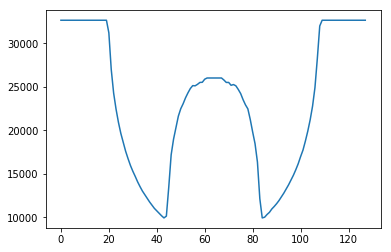

In [3]:
plt.plot(range(c),vertical_projection)

In [4]:
#horizontal projection
horizontal_projection = []
for index in range(r):
    horizontal_projection.append(np.sum(gray_img[index,:]))

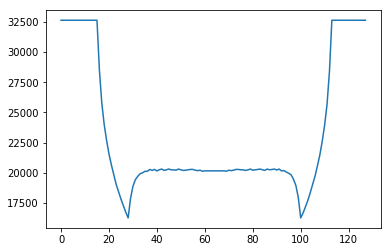

In [5]:
plt.plot(range(r),horizontal_projection)

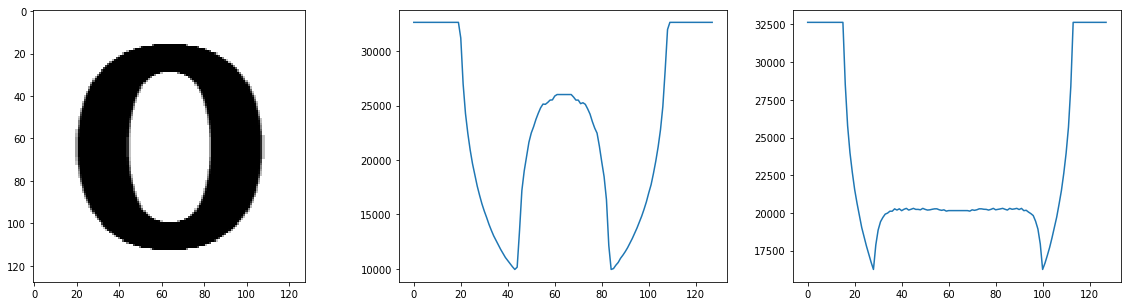

In [6]:
#plot all three together in a single graph
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)
plt.subplot(1,3,2)
plt.plot(range(c),vertical_projection)
plt.subplot(1,3,3)
plt.plot(range(r),horizontal_projection)
plt.show()

In [7]:
from skimage.util import invert

def createProjections(image_path):
    #get image and convert to grayscale
    orig_img = imread(image_path)
    gray_img = invert(rgb2gray(orig_img))
    
    #vertical projection
    r,c = gray_img.shape
    
    vertical_projection = []
    for index in range(c):
        vertical_projection.append(np.sum(gray_img[:,index]))
        
    #horizontal projection
    horizontal_projection = []
    for index in range(r):
        horizontal_projection.append(np.sum(gray_img[index,:]))
        
    #plot all three together in a single graph
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.imshow(gray_img,interpolation='nearest', cmap=plt.cm.gray)
    plt.subplot(1,3,2)
    plt.plot(range(c),vertical_projection)
    plt.subplot(1,3,3)
    plt.plot(range(r),horizontal_projection)
    plt.show()

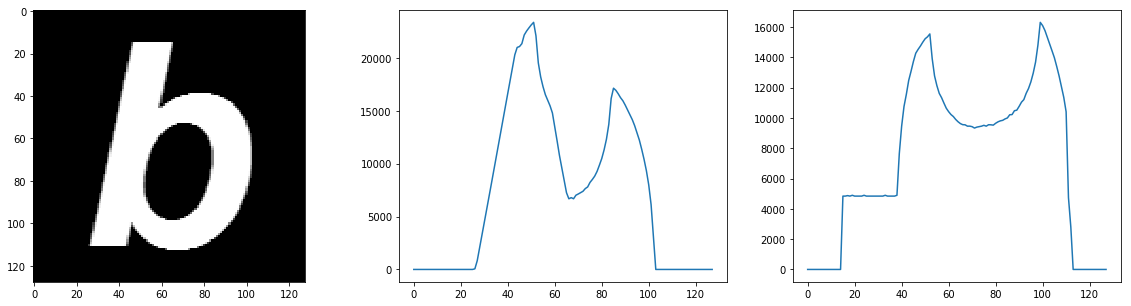

In [8]:
import os
import random
parent = 'resources/English/Fnt'

files = os.listdir(parent)
index = random.randrange(0, len(files))
files[index]

sampleimges = os.listdir(parent +"/"+ files[index])
subindex = random.randrange(0, len(sampleimges))
sampleimges[subindex]

createProjections(parent +"/"+ files[index]+"/"+sampleimges[subindex])

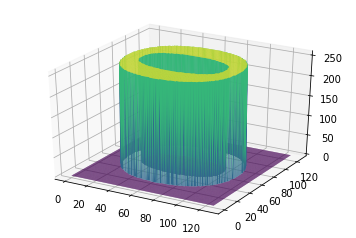

In [15]:
from skimage.util import invert
from mpl_toolkits.mplot3d import Axes3D

inv_img = invert(gray_img)
r,c = inv_img.shape
array3d = []
for ri in range(r):
    for ci in range(c):
        zval = inv_img[ri,ci]
        if zval > 0 and zval < 255:
            zval = 0
        array3d.append([ri,ci,zval])
        
X = np.array(array3d)[:,0]
Y = np.array(array3d)[:,1]
Z = np.array(array3d)[:,2]

v = np.array(array3d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(v[:,0],v[:,1],v[:,2], cmap='viridis')
plt.show()